# Regression:
* Linear Regression emphasis relation betweeen 2 variables and tries to fit relation through a line. Y = mX + C, X is the independent variable and Y is the dependent variable and C is the bias normalizer.
* Scatter Plot and Corelation coefficients are the popular metrics to determine relation beween 2 variables/features.
* Scatter plot would have x axis as independent and y axis as the one where would like to see the pattern of the target/dependent variable. It also indicates the direction of dependency.
* Corelation coefficients are the values between -1 to 1. where negative indicates indirect co relation and values closer to -1 and 1 indicates the max strength of the co relation.
* Least squarred error(popular method) is the way through which a best fit line is chosen.

In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df[["GrLivArea","SalePrice"]].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [4]:
#adding intercept
df['intercept'] = 1

lm = sm.OLS(df['SalePrice'],df[['intercept','GrLivArea']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          4.52e-223
Time:                        21:08:17   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Coef**
* intecept values indicate that when area is 0 the price of the house is 18570
* for one unit increase in area, sale price would increase by 107 dollar price.

**P>[t]**
* 0.000 (low value) indicates that the variable is important for SalePrice prediction

**R2 Squred**
* co relation between the variables (SalePrice and Area)

# Multiple Linear Regression

In [5]:
import numpy as np
df.fillna(method='ffill', inplace=True)
df['intercept'] = 1
df_1 = df.drop('SalePrice',axis=1)
lm_2 = sm.OLS(df['SalePrice'], df_1[df_1.select_dtypes(include=np.number).columns])

In [6]:
result_2 = lm_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:08:17   Log-Likelihood:                -17319.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1424   BIC:                         3.490e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -1.1630      2.187     -0.532      0.595      -5.454       3.128
MSSubClass     -185.2600     27.532     -6.729      0.000    -239.268    -131.252
LotFrontage     -77.5950     45.929     -1.689      0.091    -167.692      12.502
LotArea           0.4332      0.102      4.258      0.000       0.234       0.633
OverallQual    1.735e+04   1188.185     14.603      0.000     1.5e+04    1.97e+04
OverallCond    4655.3876   1034.811      4.499      0.000    2625.470    6685.305
YearBuilt       281.0024     66.293      4.239      0.000     150.959     411.046
YearRemodAdd    136.5182     68.805      1.984      0.047       1.547     271.489
MasVnrArea       31.1692      5.947      5.241      0.000      19.503      42.836
BsmtFinSF1        9.9700      2.529      3.942      0.000       5.008      14.932
BsmtFinSF2       -0.9849      4.507     -0.219      0.827      -9.825       7.855
BsmtUnfSF         0.0413      2.411      0.017      0.986      -4.689       4.772
TotalBsmtSF       9.0264      3.366      2.681      0.007       2.423      15.630
1stFlrSF         18.4135      6.226      2.958      0.003       6.200      30.627
2ndFlrSF         18.0480      5.729      3.150      0.002       6.810      29.285
LowQualFinSF     -5.4224     15.007     -0.361      0.718     -34.861      24.016
GrLivArea        31.0391      5.706      5.439      0.000      19.845      42.233
BsmtFullBath   9297.5490   2611.137      3.561      0.000    4175.461    1.44e+04
BsmtHalfBath   1896.0671   4092.012      0.463      0.643   -6130.951    9923.085
FullBath       3531.5583   2831.061      1.247      0.212   -2021.939    9085.056
HalfBath      -1813.0252   2662.854     -0.681      0.496   -7036.562    3410.512
BedroomAbvGr  -9994.9937   1702.703     -5.870      0.000   -1.33e+04   -6654.918
KitchenAbvGr   -1.21e+04   5210.651     -2.322      0.020   -2.23e+04   -1875.630
TotRmsAbvGrd   5051.0126   1238.389      4.079      0.000    2621.750    7480.276
Fireplaces     3878.4959   1774.621      2.186      0.029     397.345    7359.647
GarageYrBlt     101.9752     64.196      1.589      0.112     -23.953     227.904
GarageCars     1.126e+04   2873.033      3.920      0.000    5626.388    1.69e+04
GarageArea       -3.5474      9.900     -0.358      0.720     -22.968      15.874
WoodDeckSF       23.5701      8.023      2.938      0.003       7.833      39.308
OpenPorchSF      -2.3247     15.151     -0.153      0.878     -32.046      27.397
EnclosedPorch    11.7238     16.859      0.695      0.487     -21.348      44.795
3SsnPorch        18.6589     31.398      0.594      0.552     -42.933      80.251
ScreenPorch      55.6276     17.189      3.236      0.001      21.910      89.346
PoolArea        -27.7994     23.774     -1.169      0.242     -74.434      18.836
MiscVal          -0.7854      1.855     -0.423   

* How do we get the coefficient of variables? 

\begin{equation*}
\beta =((X^TX)^{Inv})X^Ty
\end{equation*}
    * note that these are matrix multiplication
    
* linear equation is : y = b0 + b1X
* multilinear equation is : y = b0 + b1.X1 + b2.X2 + b3.X3

In [8]:
df.select_dtypes(include=np.object)
#df['Grvl']= pd.get_dummies(df['Street']).drop('Pave',axis=1)
#df.drop('Grvl', axis=1, inplace=True)
df['Pave']= pd.get_dummies(df['Street']).drop('Grvl',axis=1)

df_1 = df.drop('SalePrice',axis=1)
lm_3 = sm.OLS(df['SalePrice'], df_1[df_1.select_dtypes(include=np.number).columns])

result_3 = lm_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     172.4
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:08:34   Log-Likelihood:                -17318.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1423   BIC:                         3.491e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -1.1823      2.187     -0.541      0.589      -5.473       3.108
MSSubClass     -182.7111     27.626     -6.614      0.000    -236.904    -128.518
LotFrontage     -76.4126     45.938     -1.663      0.096    -166.527      13.701
LotArea           0.4565      0.104      4.394      0.000       0.253       0.660
OverallQual    1.731e+04   1188.615     14.565      0.000     1.5e+04    1.96e+04
OverallCond    4612.5901   1035.451      4.455      0.000    2581.415    6643.765
YearBuilt       279.2873     66.306      4.212      0.000     149.219     409.356
YearRemodAdd    134.1122     68.834      1.948      0.052      -0.916     269.140
MasVnrArea       31.1182      5.947      5.233      0.000      19.452      42.784
BsmtFinSF1        9.8914      2.530      3.909      0.000       4.928      14.855
BsmtFinSF2       -0.9511      4.506     -0.211      0.833      -9.791       7.889
BsmtUnfSF         0.0513      2.411      0.021      0.983      -4.679       4.781
TotalBsmtSF       8.9916      3.366      2.671      0.008       2.388      15.595
1stFlrSF         18.4069      6.225      2.957      0.003       6.195      30.619
2ndFlrSF         18.0001      5.728      3.142      0.002       6.763      29.237
LowQualFinSF     -5.5701     15.007     -0.371      0.711     -35.007      23.867
GrLivArea        30.8368      5.709      5.402      0.000      19.638      42.036
BsmtFullBath   9348.0382   2611.329      3.580      0.000    4225.570    1.45e+04
BsmtHalfBath   1816.6801   4092.317      0.444      0.657   -6210.941    9844.301
FullBath       3509.2958   2830.909      1.240      0.215   -2043.906    9062.498
HalfBath      -1808.7743   2662.646     -0.679      0.497   -7031.907    3414.358
BedroomAbvGr  -9973.7163   1702.677     -5.858      0.000   -1.33e+04   -6633.689
KitchenAbvGr  -1.232e+04   5214.125     -2.363      0.018   -2.25e+04   -2091.587
TotRmsAbvGrd   5049.1053   1238.293      4.077      0.000    2620.030    7478.180
Fireplaces     3868.0277   1774.506      2.180      0.029     387.100    7348.955
GarageYrBlt     103.3984     64.204      1.610      0.108     -22.545     229.342
GarageCars     1.121e+04   2873.174      3.902      0.000    5575.218    1.68e+04
GarageArea       -2.8243      9.921     -0.285      0.776     -22.286      16.638
WoodDeckSF       23.6750      8.023      2.951      0.003       7.938      39.412
OpenPorchSF      -1.9319     15.154     -0.127      0.899     -31.659      27.795
EnclosedPorch    11.3412     16.861      0.673      0.501     -21.735      44.417
3SsnPorch        18.5374     31.396      0.590      0.555     -43.050      80.125
ScreenPorch      56.2406     17.196      3.270      0.001      22.508      89.974
PoolArea        -27.9798     23.772     -1.177      0.239     -74.612      18.653
MiscVal          -0.7415      1.855     -0.400   

* **Linear Regression** assumes following between predictor and response variable:
    * Linearity: y_actual - y_pred vs y_actual should indicate random scatter.
    * Corelated Error: Durbin-Watson test to detect to check if the coreation error is an issue. ARMA models are best suited for such co related data.
    * Non-constant Variance and Normally Distributed Errors : BoxCox transformation to get rid of non-constant variance.
    * Outliers: regularization technique helps in reducing large outliers.
    * Collinearirty(multi-collinearity): correlation between predictor variables. Identified through bi variate plot or Variance Inflation Factor.

In [9]:
import seaborn as sb
%matplotlib inline

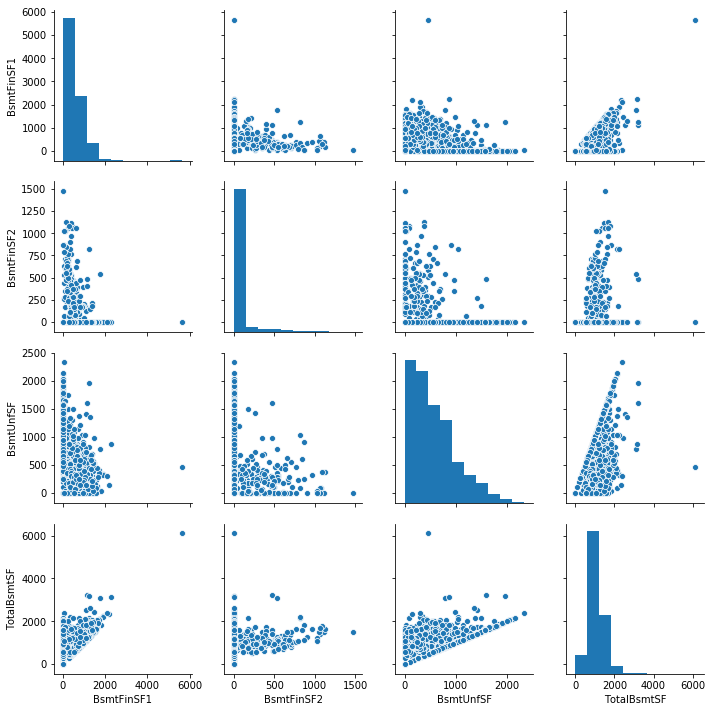

In [18]:
sb.pairplot(df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]);

In [12]:
lm = sm.OLS(df['SalePrice'], df[['intercept','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     306.3
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          3.76e-154
Time:                        21:43:08   Log-Likelihood:                -18187.
No. Observations:                1460   AIC:                         3.638e+04
Df Residuals:                    1456   BIC:                         3.640e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    6.546e+04   4288.789     15.264      0.000    5.71e+04    7.39e+04
BsmtFinSF1     45.1125      3.599     12.533      0.000      38.052      52.173
BsmtFinSF2     -2.4304      7.611     -0.319      0.750     -17.361      12.500
BsmtUnfSF      31.0362      3.414      9.090      0.000      24.339      37.734
TotalBsmtSF    73.7183      3.600     20.476      0.000      66.656      80.780
==============================================================================
Omnibus:                      363.947   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7853.073
Skew:                           0.615   Prob(JB):                         0.00
Kurtosis:                      14.295   Cond. No.                     2.59e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.18e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

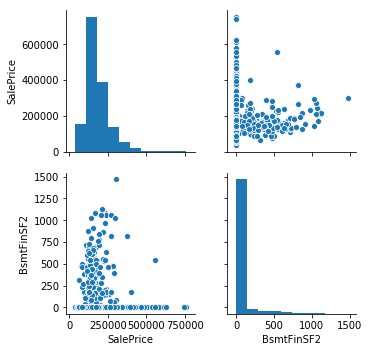

In [20]:
sb.pairplot(df[['SalePrice', 'BsmtFinSF2']]);

##### Side effect of multicollinearity: Coefficient for BsmtFinSF2 is negative, which is against our intuition of better the finishing in the basement better is the saleprice.  Here, it is bit hard to say there is linear relation between SalePrice and BsmtFinSF2. Therefore, let us look at one more example.

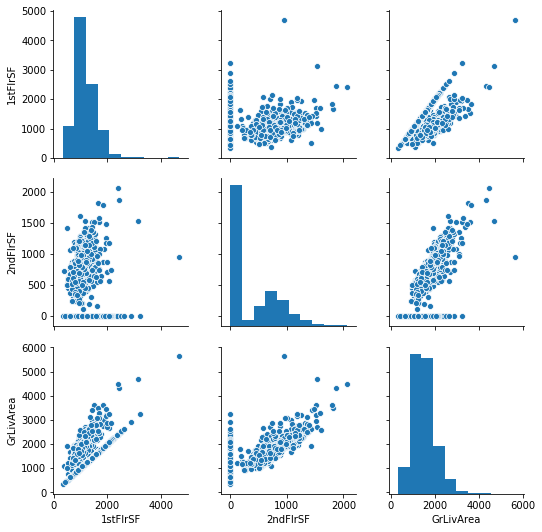

In [17]:
sb.pairplot(df[['1stFlrSF','2ndFlrSF','GrLivArea']]);

In [14]:
lm = sm.OLS(df['SalePrice'],df[['intercept', '1stFlrSF', '2ndFlrSF', 'GrLivArea']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     651.0
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          2.42e-268
Time:                        21:46:37   Log-Likelihood:                -17923.
No. Observations:                1460   AIC:                         3.585e+04
Df Residuals:                    1456   BIC:                         3.588e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -1.5e+04   4734.060     -3.168      0.002   -2.43e+04   -5709.061
1stFlrSF     217.2697     28.263      7.687      0.000     161.828     272.711
2ndFlrSF     158.0036     28.415      5.561      0.000     102.265     213.742
GrLivArea    -73.5834     28.039     -2.624      0.009    -128.585     -18.582
==============================================================================
Omnibus:                      402.332   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14083.919
Skew:                          -0.583   Prob(JB):                         0.00
Kurtosis:                      18.171   Cond. No.                     7.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

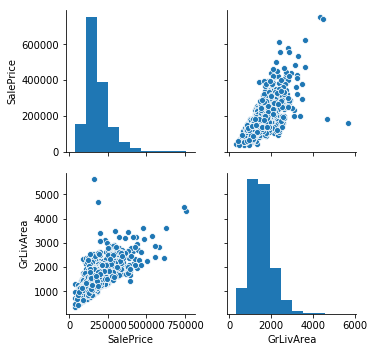

In [21]:
sb.pairplot(df[['SalePrice', 'GrLivArea']]);

##### 2nd example of multicollinearity issue in linear regression: coefficient of GrLivArea is negative though the correlation with SalePrice is +ve.

#### Variance Inflation Factor

In [45]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#df.drop('intercept',axis=1,inplace=True)

In [50]:
y,x = dmatrices('SalePrice ~ GrLivArea + FullBath + TotRmsAbvGrd+ BsmtFinSF1 + BsmtFinSF2+ TotalBsmtSF + BsmtUnfSF', df.fillna(0), return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,22.102421,Intercept
1,4.272157,GrLivArea
2,1.727135,FullBath
3,3.357473,TotRmsAbvGrd
4,inf,BsmtFinSF1
5,inf,BsmtFinSF2
6,inf,TotalBsmtSF
7,inf,BsmtUnfSF


In [51]:
y,x = dmatrices('SalePrice ~ GrLivArea + FullBath + TotRmsAbvGrd+ BsmtFinSF1 +  TotalBsmtSF + BsmtUnfSF', df.fillna(0), return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,22.102421,Intercept
1,4.272157,GrLivArea
2,1.727135,FullBath
3,3.357473,TotRmsAbvGrd
4,8.818277,BsmtFinSF1
5,8.192020,TotalBsmtSF
6,7.864524,BsmtUnfSF


##### Notice that how removing BsmtFinSF2 changed the vif value for the Bsmt variables.